# 0507-0509 Regression_Review 및 실습

# import modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# data preparation and visualization

In [2]:
pd.read_csv('regression.csv', delimiter=',')

,X,Y
0,3.300,1.700
1,4.400,2.760
2,5.500,2.090
3,6.710,3.190
4,6.930,1.694
5,4.168,1.573
6,9.779,3.366
7,6.182,2.596
8,7.590,2.530
9,2.167,1.221


**regression과 classification**

1. continuous에서 continuous 형태는 regression(숫자 대 숫자) -linear
2. continuous에서 discreet classification형태는 - non-linear을 추가

위와 같은 regression.csv data는 regression을 사용

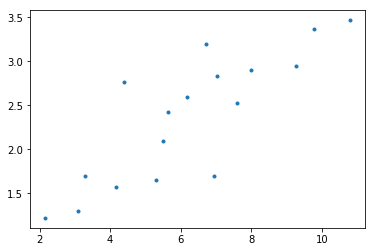

In [3]:
pd.read_csv('regression.csv')
data = pd.read_csv('regression.csv')
X = data['X']
Y = data['Y']             
plt.plot(X,Y, '.')

# create model

1. sequential: 앞으로 쭉 나가는 계속적인 모델을 쓰겠다
2. input shape: 입력 갯수
3. optimizer='rmsprop' 많이 씀

**4. hidden layer을 넣는 방법**

 model.add(Dense(3)) 등 계속 layer 추가 가능
 
 그러나 제일 마지막의 Dense(4)를 넣는다면 hidden layer가 될 수 없다
 
 우리 데이터는 입력 1, 출력 1이기 때문에 무조건 1로 끝나야 하기 때문 ->그래서 Dense(1)로 바꾸었음
 
5. activation = 'sigmoid'를 통해 non-linearity를 부여


In [7]:
model = Sequential()
model.add(Dense(10, input_shape=[1]))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(6, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='mse')

Instructions for updating:
Use tf.cast instead.


# train model

- creating good model = fil한 a, b값을 만드는것

In [8]:
model.fit(X,Y, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
17/17 [==============================] - 1s 52ms/sample - loss: 3.8533
Epoch 2/100
17/17 [==============================] - 0s 235us/sample - loss: 3.8245
Epoch 3/100
17/17 [==============================] - 0s 56us/sample - loss: 3.8022
Epoch 4/100
17/17 [==============================] - 0s 179us/sample - loss: 3.7825
Epoch 5/100
17/17 [==============================] - 0s 223us/sample - loss: 3.7641
Epoch 6/100
17/17 [==============================] - 0s 192us/sample - loss: 3.7463
Epoch 7/100
17/17 [==============================] - 0s 0s/sample - loss: 3.7288
Epoch 8/100
17/17 [==============================] - 0s 298us/sample - loss: 3.7113
Epoch 9/100
17/17 [==============================] - 0s 176us/sample - loss: 3.6937
Epoch 10/100
17/17 [==============================] - 0s 103us/sample - loss: 3.6759
Epoch 11/100
17/17 [==============================] - 0s 211us/sample - loss: 3.6577
Epoch 12/100
17/17 [===========

Epoch 95/100
17/17 [==============================] - 0s 127us/sample - loss: 2.7148
Epoch 96/100
17/17 [==============================] - 0s 180us/sample - loss: 2.7113
Epoch 97/100
17/17 [==============================] - 0s 117us/sample - loss: 2.7079
Epoch 98/100
17/17 [==============================] - 0s 189us/sample - loss: 2.7046
Epoch 99/100
17/17 [==============================] - 0s 195us/sample - loss: 2.7013
Epoch 100/100
17/17 [==============================] - 0s 117us/sample - loss: 2.6981


- 17/17 : 우리의 17가지 data를 이용하였다

- 첫번째에는 data loss가 2였는데 마지막에는 0.1까지 내려감 ->점차 수렴

# model prediction

- prediction: 위에서 구한 것 a, b값이 실제로도 잘 되는지 확인 (시스템을 만들고 결과를 모르는 상태에서 입력값을 넣어보는 것)

- 어떠한 x값을 내가 제공하고, y값을 구함

In [9]:
x = [0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10]
y = model.predict(x)

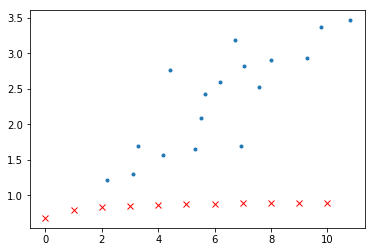

In [10]:
plt.plot(X,Y,'.')
plt.plot(x, y, 'rx')
plt.show()

# what are a and b in y = ax + b?

- 위에서 만든 a, b가 궁금할 때

- layer: 함수의 층위->우리는 하나만 만들었으므로 [0] 첫번째 하나만 가져와라

- weight: 그 값

In [11]:
weight = model.layers[0].get_weights()
print(weight)

[array([[-0.6230841 , -0.5493697 ,  0.12150744,  0.30245757,  0.42929998,
        -0.2940029 , -0.00905679, -0.25402358,  0.6133135 ,  0.10206959]],
      dtype=float32), array([-0.08368193,  0.01345438,  0.1052963 ,  0.01906287,  0.10806172,
        0.04424338, -0.04936198, -0.1047379 ,  0.09669   ,  0.09202082],
      dtype=float32)]


# 실습 w/ boston_housing

In [12]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as mp
import matplotlib.pyplot as plt

1. boston housing data 불러오기 
    - x_train, y_train), (x_test, y_test) 은 4개의 variable

In [14]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

- 13개의 입력값이 있기 때문에 input_shape = 13

In [15]:
model = Sequential()
model.add(Dense(1, input_shape=[13]))
model.compile(optimizer = 'rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


2. 데이터 훈련
    - model.fit = 이미 있는 데이터로 훈련
    - epochs = 1 -> data들을 한번 돌린다

In [18]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
404/404 [==============================] - 0s 84us/sample - loss: 80.6580
Epoch 2/1000
404/404 [==============================] - 0s 105us/sample - loss: 80.9807
Epoch 3/1000
404/404 [==============================] - 0s 103us/sample - loss: 79.9680
Epoch 4/1000
404/404 [==============================] - 0s 94us/sample - loss: 79.7485
Epoch 5/1000
404/404 [==============================] - 0s 93us/sample - loss: 79.5067
Epoch 6/1000
404/404 [==============================] - 0s 105us/sample - loss: 77.8079
Epoch 7/1000
404/404 [==============================] - 0s 107us/sample - loss: 78.1623
Epoch 8/1000
404/404 [==============================] - 0s 102us/sample - loss: 76.7282
Epoch 9/1000
404/404 [==============================] - 0s 100us/sample - loss: 76.6143
Epoch 10/1000
404/404 [==============================] - 0s 110us/sample - loss: 76.9134
Epoch 11/1000
404/404 [==============================] - 0s 90us/sample - loss: 75.3941
Epoch 12/1000
404/404 [===========

404/404 [==============================] - 0s 62us/sample - loss: 53.4250
Epoch 95/1000
404/404 [==============================] - 0s 69us/sample - loss: 53.4040
Epoch 96/1000
404/404 [==============================] - 0s 69us/sample - loss: 53.1719
Epoch 97/1000
404/404 [==============================] - 0s 69us/sample - loss: 52.8103
Epoch 98/1000
404/404 [==============================] - 0s 66us/sample - loss: 53.1361
Epoch 99/1000
404/404 [==============================] - 0s 65us/sample - loss: 52.7770
Epoch 100/1000
404/404 [==============================] - 0s 71us/sample - loss: 53.4236
Epoch 101/1000
404/404 [==============================] - 0s 68us/sample - loss: 52.2128
Epoch 102/1000
404/404 [==============================] - 0s 66us/sample - loss: 52.4875
Epoch 103/1000
404/404 [==============================] - 0s 65us/sample - loss: 52.2134
Epoch 104/1000
404/404 [==============================] - 0s 69us/sample - loss: 51.6476
Epoch 105/1000
404/404 [=================

404/404 [==============================] - 0s 69us/sample - loss: 44.0253
Epoch 187/1000
404/404 [==============================] - 0s 67us/sample - loss: 43.6245
Epoch 188/1000
404/404 [==============================] - 0s 63us/sample - loss: 44.4981
Epoch 189/1000
404/404 [==============================] - 0s 72us/sample - loss: 43.6852
Epoch 190/1000
404/404 [==============================] - 0s 72us/sample - loss: 43.8280
Epoch 191/1000
404/404 [==============================] - 0s 70us/sample - loss: 43.1817
Epoch 192/1000
404/404 [==============================] - 0s 68us/sample - loss: 43.8904
Epoch 193/1000
404/404 [==============================] - 0s 65us/sample - loss: 43.5352
Epoch 194/1000
404/404 [==============================] - 0s 64us/sample - loss: 43.0267
Epoch 195/1000
404/404 [==============================] - 0s 69us/sample - loss: 43.7152
Epoch 196/1000
404/404 [==============================] - 0s 78us/sample - loss: 43.0050
Epoch 197/1000
404/404 [============

404/404 [==============================] - 0s 62us/sample - loss: 38.9871
Epoch 279/1000
404/404 [==============================] - 0s 68us/sample - loss: 38.9181
Epoch 280/1000
404/404 [==============================] - 0s 61us/sample - loss: 39.5118
Epoch 281/1000
404/404 [==============================] - 0s 74us/sample - loss: 38.2356
Epoch 282/1000
404/404 [==============================] - 0s 71us/sample - loss: 39.2790
Epoch 283/1000
404/404 [==============================] - 0s 70us/sample - loss: 38.6269
Epoch 284/1000
404/404 [==============================] - 0s 65us/sample - loss: 39.3090
Epoch 285/1000
404/404 [==============================] - 0s 61us/sample - loss: 39.1047
Epoch 286/1000
404/404 [==============================] - 0s 69us/sample - loss: 38.1583
Epoch 287/1000
404/404 [==============================] - 0s 75us/sample - loss: 38.3665
Epoch 288/1000
404/404 [==============================] - 0s 71us/sample - loss: 38.1802
Epoch 289/1000
404/404 [============

404/404 [==============================] - 0s 69us/sample - loss: 35.5006
Epoch 371/1000
404/404 [==============================] - 0s 63us/sample - loss: 36.1524
Epoch 372/1000
404/404 [==============================] - 0s 64us/sample - loss: 35.8169
Epoch 373/1000
404/404 [==============================] - 0s 72us/sample - loss: 36.0832
Epoch 374/1000
404/404 [==============================] - 0s 62us/sample - loss: 35.7879
Epoch 375/1000
404/404 [==============================] - 0s 66us/sample - loss: 36.1881
Epoch 376/1000
404/404 [==============================] - 0s 72us/sample - loss: 35.5706
Epoch 377/1000
404/404 [==============================] - 0s 74us/sample - loss: 35.6256
Epoch 378/1000
404/404 [==============================] - 0s 72us/sample - loss: 35.4715
Epoch 379/1000
404/404 [==============================] - 0s 74us/sample - loss: 35.7289
Epoch 380/1000
404/404 [==============================] - 0s 71us/sample - loss: 35.6064
Epoch 381/1000
404/404 [============

404/404 [==============================] - 0s 61us/sample - loss: 33.7670
Epoch 463/1000
404/404 [==============================] - 0s 62us/sample - loss: 34.4276
Epoch 464/1000
404/404 [==============================] - 0s 71us/sample - loss: 33.8964
Epoch 465/1000
404/404 [==============================] - 0s 68us/sample - loss: 33.4313
Epoch 466/1000
404/404 [==============================] - 0s 69us/sample - loss: 33.2423
Epoch 467/1000
404/404 [==============================] - 0s 70us/sample - loss: 33.6164
Epoch 468/1000
404/404 [==============================] - 0s 71us/sample - loss: 33.3276
Epoch 469/1000
404/404 [==============================] - 0s 74us/sample - loss: 34.0035
Epoch 470/1000
404/404 [==============================] - 0s 73us/sample - loss: 33.1339
Epoch 471/1000
404/404 [==============================] - 0s 70us/sample - loss: 33.2043
Epoch 472/1000
404/404 [==============================] - 0s 71us/sample - loss: 33.9622
Epoch 473/1000
404/404 [============

404/404 [==============================] - 0s 71us/sample - loss: 31.6880
Epoch 555/1000
404/404 [==============================] - 0s 71us/sample - loss: 32.5759
Epoch 556/1000
404/404 [==============================] - 0s 69us/sample - loss: 31.9275
Epoch 557/1000
404/404 [==============================] - 0s 65us/sample - loss: 31.8444
Epoch 558/1000
404/404 [==============================] - 0s 61us/sample - loss: 32.4631
Epoch 559/1000
404/404 [==============================] - 0s 70us/sample - loss: 31.7941
Epoch 560/1000
404/404 [==============================] - 0s 77us/sample - loss: 31.9980
Epoch 561/1000
404/404 [==============================] - 0s 67us/sample - loss: 31.9158
Epoch 562/1000
404/404 [==============================] - 0s 64us/sample - loss: 32.3093
Epoch 563/1000
404/404 [==============================] - 0s 63us/sample - loss: 32.0333
Epoch 564/1000
404/404 [==============================] - 0s 68us/sample - loss: 31.3586
Epoch 565/1000
404/404 [============

404/404 [==============================] - 0s 68us/sample - loss: 30.9737
Epoch 647/1000
404/404 [==============================] - 0s 72us/sample - loss: 30.1581
Epoch 648/1000
404/404 [==============================] - 0s 72us/sample - loss: 30.6540
Epoch 649/1000
404/404 [==============================] - 0s 77us/sample - loss: 30.8142
Epoch 650/1000
404/404 [==============================] - 0s 70us/sample - loss: 30.4840
Epoch 651/1000
404/404 [==============================] - 0s 72us/sample - loss: 30.8088
Epoch 652/1000
404/404 [==============================] - 0s 63us/sample - loss: 30.4906
Epoch 653/1000
404/404 [==============================] - 0s 68us/sample - loss: 30.7229
Epoch 654/1000
404/404 [==============================] - 0s 70us/sample - loss: 30.8032
Epoch 655/1000
404/404 [==============================] - 0s 68us/sample - loss: 30.1185
Epoch 656/1000
404/404 [==============================] - 0s 66us/sample - loss: 30.6991
Epoch 657/1000
404/404 [============

404/404 [==============================] - 0s 65us/sample - loss: 29.9804
Epoch 739/1000
404/404 [==============================] - 0s 68us/sample - loss: 29.8260
Epoch 740/1000
404/404 [==============================] - 0s 80us/sample - loss: 29.3726
Epoch 741/1000
404/404 [==============================] - 0s 59us/sample - loss: 29.9597
Epoch 742/1000
404/404 [==============================] - 0s 69us/sample - loss: 29.6236
Epoch 743/1000
404/404 [==============================] - 0s 79us/sample - loss: 29.6809
Epoch 744/1000
404/404 [==============================] - 0s 70us/sample - loss: 29.5602
Epoch 745/1000
404/404 [==============================] - 0s 64us/sample - loss: 29.4594
Epoch 746/1000
404/404 [==============================] - 0s 72us/sample - loss: 29.8115
Epoch 747/1000
404/404 [==============================] - 0s 76us/sample - loss: 29.4801
Epoch 748/1000
404/404 [==============================] - 0s 65us/sample - loss: 29.8421
Epoch 749/1000
404/404 [============

404/404 [==============================] - 0s 72us/sample - loss: 28.5430
Epoch 831/1000
404/404 [==============================] - 0s 67us/sample - loss: 28.7329
Epoch 832/1000
404/404 [==============================] - 0s 73us/sample - loss: 28.9949
Epoch 833/1000
404/404 [==============================] - 0s 73us/sample - loss: 28.3968
Epoch 834/1000
404/404 [==============================] - 0s 68us/sample - loss: 28.4171
Epoch 835/1000
404/404 [==============================] - 0s 75us/sample - loss: 28.7567
Epoch 836/1000
404/404 [==============================] - 0s 71us/sample - loss: 28.6295
Epoch 837/1000
404/404 [==============================] - 0s 67us/sample - loss: 28.4904
Epoch 838/1000
404/404 [==============================] - 0s 69us/sample - loss: 28.8561
Epoch 839/1000
404/404 [==============================] - 0s 69us/sample - loss: 28.3666
Epoch 840/1000
404/404 [==============================] - 0s 76us/sample - loss: 28.5787
Epoch 841/1000
404/404 [============

404/404 [==============================] - 0s 70us/sample - loss: 28.4085
Epoch 923/1000
404/404 [==============================] - 0s 72us/sample - loss: 28.4340
Epoch 924/1000
404/404 [==============================] - 0s 69us/sample - loss: 27.5684
Epoch 925/1000
404/404 [==============================] - 0s 66us/sample - loss: 28.7485
Epoch 926/1000
404/404 [==============================] - 0s 67us/sample - loss: 28.3152
Epoch 927/1000
404/404 [==============================] - 0s 68us/sample - loss: 27.9917
Epoch 928/1000
404/404 [==============================] - ETA: 0s - loss: 39.05 - 0s 71us/sample - loss: 27.5796
Epoch 929/1000
404/404 [==============================] - 0s 69us/sample - loss: 28.2139
Epoch 930/1000
404/404 [==============================] - 0s 67us/sample - loss: 28.2479
Epoch 931/1000
404/404 [==============================] - 0s 64us/sample - loss: 27.8196
Epoch 932/1000
404/404 [==============================] - 0s 65us/sample - loss: 27.8450
Epoch 933/10

3. 훈련값을 가지고 새로 테스트
    - model.evaluate = 새로 test

In [19]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 63us/sample - loss: 28.5282


28.52822561825023